## Load Data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/code/anirbansarkar823/telecom-customer-churn-prediction

https://javilopezcastillo.medium.com/telecom-churn-analysis-using-clustering-techniques-for-customer-segmentation-4cdb7318f672

https://github.com/jlopez873?tab=repositories

## Import Data

In [7]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check the Duplicate

In [81]:
print(df.duplicated().value_counts())

False    7043
dtype: int64


## Check the missing Values

In [82]:
df.isnull().values.any()

False

## Descriptive Overview

In [84]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.5,70.35,89.85,118.75


In [88]:
df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


## Target Value Modification

In [43]:
# Count the oocurance of unique values in the 'Churn' Column

churn_counts =  df.Churn.value_counts(normalize=True)
churn_counts

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [52]:
# Calculate the percentage of 'Yes' and 'No' label

total_count = churn_counts.sum()

percentage_yes = (churn_counts['Yes']/ total_count) * 100
percentage_no = (churn_counts['No']/ total_count) *100

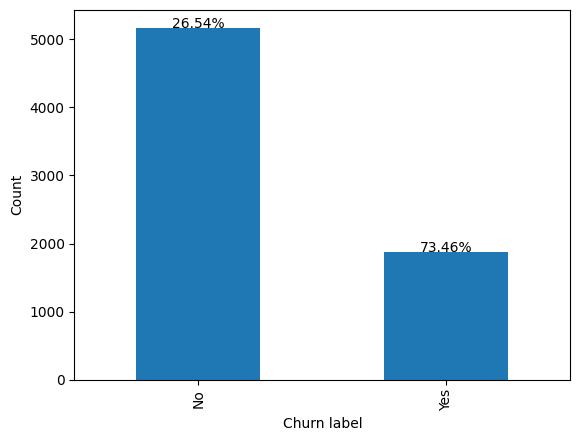

In [75]:
# Plot the target value
ax = churn_counts.plot(kind='bar')

# Annotate the bars with percentages
for i, count in enumerate(churn_counts):
    percentage = percentage_yes if i == 0 else percentage_no
    ax.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center')
    
    
plt.xlabel("Churn label")
plt.ylabel("Count")
plt.show()

**Obsevation**

- The dataset exhibits a significant class imbalance, with a larger amount of data representing non-churners. 